In [12]:
import warnings

warnings.filterwarnings("ignore")
import quandl, math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

style.use('ggplot')

In [13]:
df = quandl.get("WIKI/JPM")

In [14]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [15]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

In [16]:
X = np.array(df.drop(['label'], 1))
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

In [17]:
df.dropna(inplace=True)

y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)

In [19]:
forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

In [20]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [21]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]

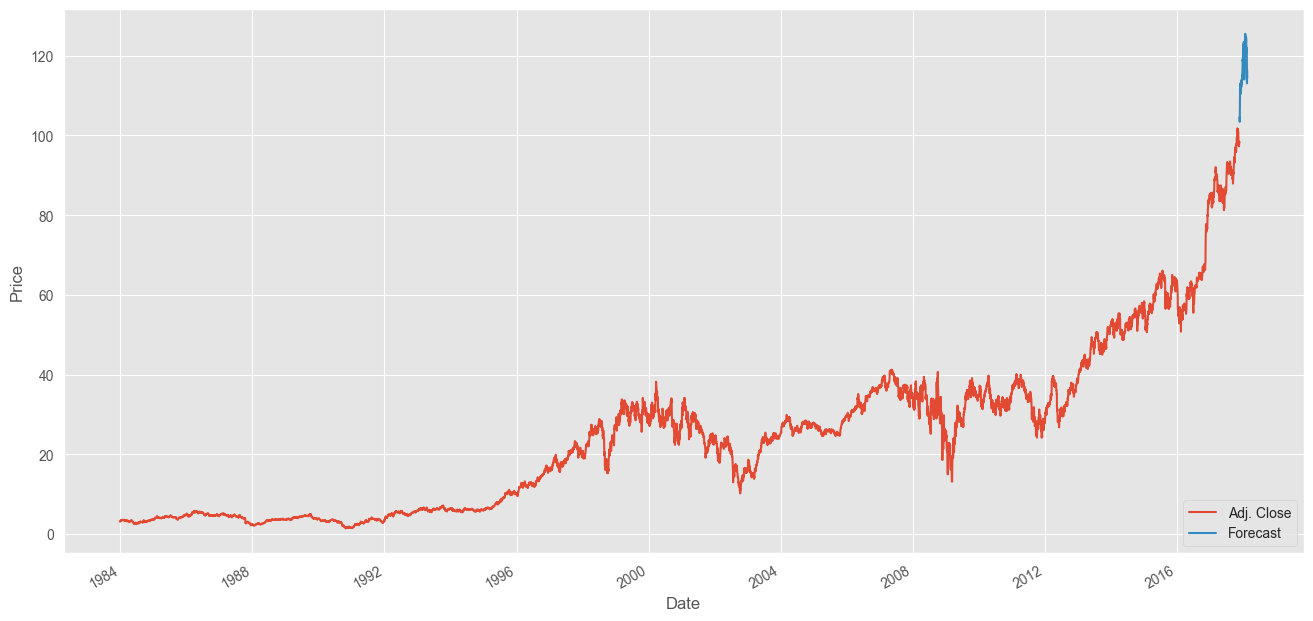

In [22]:
plt.figure(figsize=(16,8))
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (50,) and (8581,)

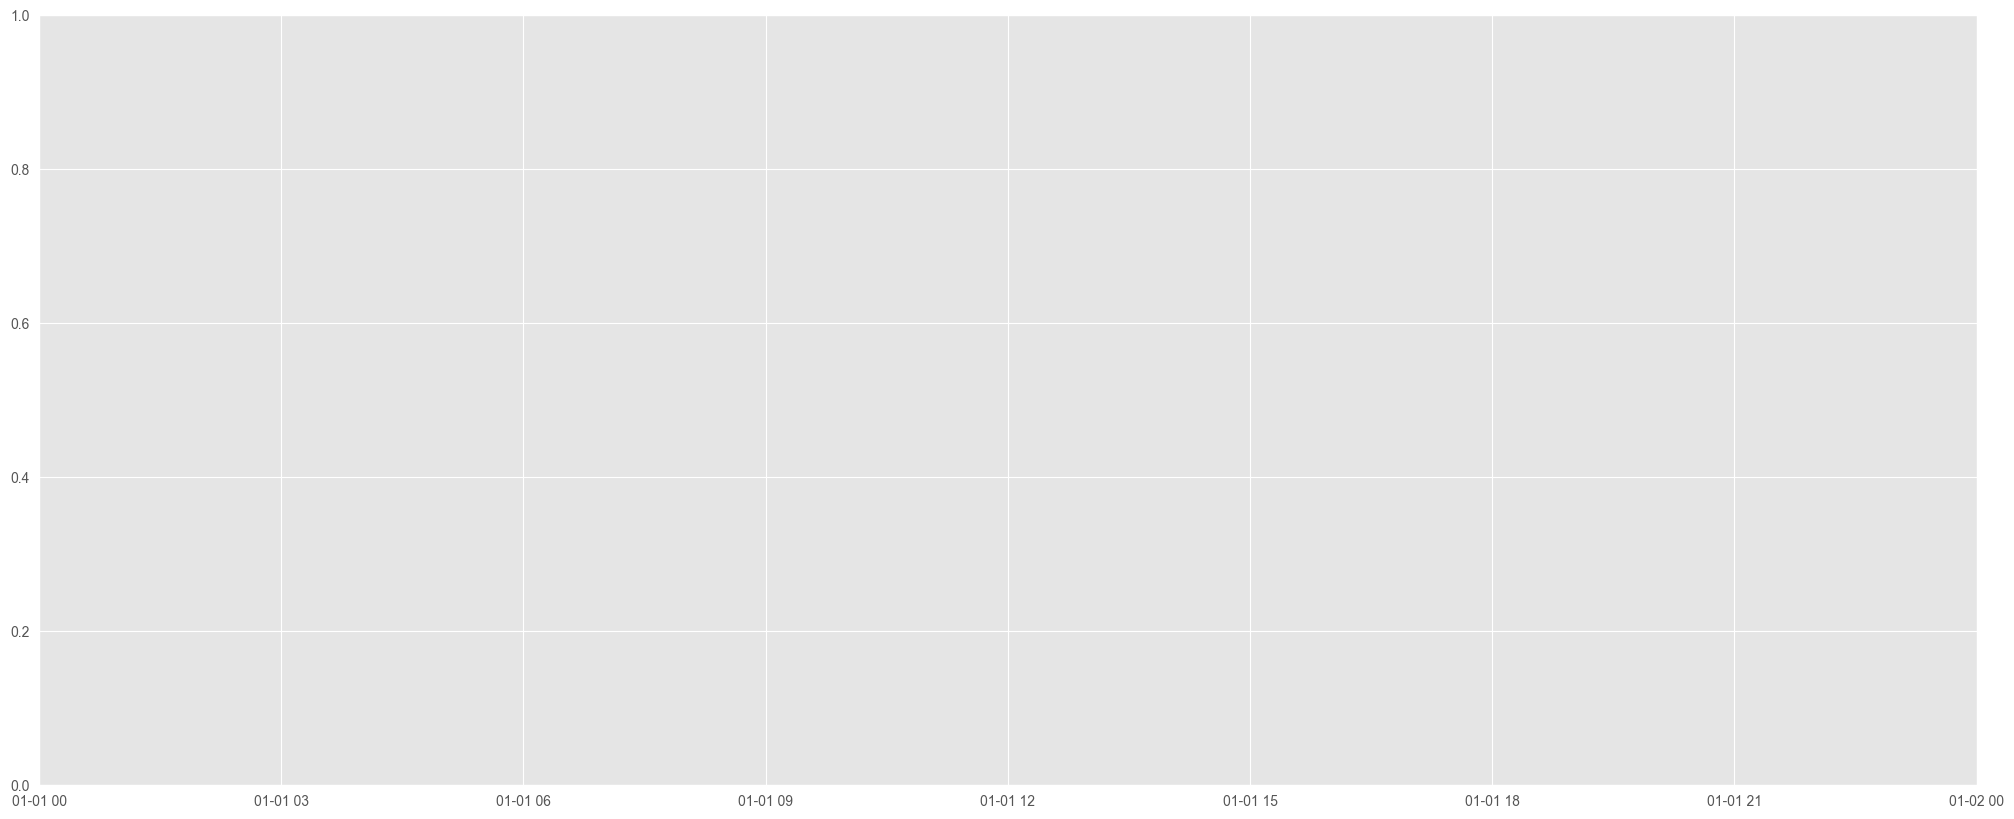

In [62]:
number_of_observations = 50
index_point = df.shape[0] - number_of_observations
x_ax = df.index.tolist()[index_point:]

plt.figure(figsize=(25, 10))
plt.plot(x_ax, df['Adj. Close'].tail(index_point), label="Actual", color='red', linewidth=2)
#plt.plot(x_ax, df['Forecast'].tail(200), label="Forcast", color='blue', linewidth=2)

In [53]:
df['Forecast'].tail(100)

Date
2017-12-25    118.614545
2017-12-26    119.352334
2017-12-27    119.662114
2017-12-28    119.438157
2017-12-29    120.753157
2017-12-30    120.662614
2017-12-31    122.213897
2018-01-01    122.265586
2018-01-02    122.896470
2018-01-03    122.774940
2018-01-04    121.634737
2018-01-05    122.219725
2018-01-06    123.472668
2018-01-07    120.769351
2018-01-08    114.851124
2018-01-09    118.299477
2018-01-10    119.212963
2018-01-11    114.021855
2018-01-12    116.205041
2018-01-13    118.031907
2018-01-14    118.756129
2018-01-15    121.471960
2018-01-16    122.044457
2018-01-17    121.166810
2018-01-18    121.203336
2018-01-19    121.681445
2018-01-20    121.508723
2018-01-21    123.900494
2018-01-22    125.503332
2018-01-23    124.044154
2018-01-24    122.060836
2018-01-25    119.846158
2018-01-26    119.706993
2018-01-27    121.456593
2018-01-28    121.680303
2018-01-29    121.192635
2018-01-30    121.222000
2018-01-31    124.686948
2018-02-01    124.332041
2018-02-02    122.84

In [36]:
df['Adj. Close'].tail(100)

Date
2017-10-31    100.61
2017-11-01    100.92
2017-11-02    101.59
2017-11-03    101.41
2017-11-06    100.78
               ...  
2018-02-08       NaN
2018-02-09       NaN
2018-02-10       NaN
2018-02-11       NaN
2018-02-12       NaN
Name: Adj. Close, Length: 100, dtype: float64